In [79]:
import regex
import pandas as pd
import numpy as np
import emoji
import collections
import re
import datetime
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [80]:
### checking for date and time format 
def date_time(s):
    pattern = r'^\[(\d{2}\.\d{2}\.\d{2}, \d{2}:\d{2}:\d{2})\]'
    result = re.match(pattern, s)
    if result:
        return True
    return False


### trying to find the author by taking a string as input
def find_author(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    elif re.match(r'^\u202a\+\d{1,3}\s\d{3}\s\d{6,8}\u202c$', s[0]):
        return True
    else:
        return False
    
### extracting information such as the date, time, author, and message
def getDatapoint(line):
    splitline = line.split('] ')
    dateTime = splitline[0][1:]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        # return None for date and time if they cannot be extracted
        return None, None, None, ''
    message = ' '.join(splitline[1:])
    if find_author(message):
        spliteMessage = message.split(':')
        author = spliteMessage[0]
        message = ' '.join(spliteMessage[1:])
    else:
        author = None
    if time[5] == ":":
        time = time[:5] + time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6] + time[-3:]
        else:
            time = time[:6]
    datetime_obj = datetime.strptime(dateTime, '%d.%m.%y, %H:%M:%S')
    date = datetime_obj.date()
    time = datetime_obj.time().strftime('%H:%M:%S')
    return date, time, author, message

In [81]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe

conversationPath = '/Users/nimats/Programming projects/PyML/WhatsApp/Data/_chat.txt'

with open(conversationPath, encoding="utf-8") as fp:
    first = fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print(first)
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if date_time(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDatapoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
        

[14.10.22, 18:57:05] Informatik plus Statistik: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.



In [82]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df = df.dropna()
URLPLATTERN = r'(https?://\S+)' # detecting URLs 
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPLATTERN, x)).str.len()

In [83]:
df.isnull().sum()

Date        0
Time        0
Author      0
Message     0
urlcount    0
dtype: int64

In [84]:
df = df.dropna()
df = df.reset_index(drop=True)
df.index += 1
df.shape

(849, 5)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 1 to 849
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      849 non-null    object
 1   Time      849 non-null    object
 2   Author    849 non-null    object
 3   Message   849 non-null    object
 4   urlcount  849 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 33.3+ KB


In [86]:
df.head(30)

,Date,Time,Author,Message,urlcount
1,2022-10-18,16:54:32,‪+49 162 8147633‬,‎‪+49 162 8147633‬ joined using this group's ...,0
2,2022-10-20,08:59:15,‪+49 162 9052377‬,‎‪+49 162 9052377‬ joined using this group's ...,0
3,2022-10-20,08:59:18,‪+49 162 9052377‬,ho,0
4,2022-10-20,09:05:06,‪+49 162 9052377‬,"weiß jemand, ob die Vorlesung auch online ist...",0
5,2022-10-20,09:05:15,‪+49 162 9052377‬,bin auf Moodle nicht fündig geworden,0
6,2022-10-20,09:10:14,Anastasiia 125 Petrus-Lmu-sta,k.A. ob es online sein wird. (Du kannst siche...,1
7,2022-10-20,09:58:33,‪+49 1573 7799644‬,Gehen wir also heute in die Mensa hin?,0
8,2022-10-20,10:38:47,Anastasiia 125 Petrus-Lmu-sta,Möchte jemand kommen? 🤔☝️,0
9,2022-10-20,10:40:03,‪+49 1525 1325749‬,Vllt komm ich spontan dazu,0
10,2022-10-20,13:14:42,‪+49 176 69381434‬,Ich bin da,0


In [87]:
weeks = {
    0 : 'Mon',
    1 : 'Tue',
    2 : 'Wed',
    3 : 'Thr',
    4 : 'Fri',
    5 : 'Sat',
    6 : 'Sun'
}

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract the year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

df['Hour'] = pd.to_datetime(df['Time']).dt.hour

df['Weekday'] = df['Date'].dt.weekday.map(weeks)
df = df[['Date','Weekday','Time','Author','Message', 'urlcount', 'Hour', 'Month', 'Year']]
df['Weekday'] = df['Weekday'].astype('category')

In [88]:
df.tail()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year
845,2023-04-16,Sun,17:16:35,‪+49 162 8558714‬,brauchen Wir auch stochastik und statistik? a...,0,17,4,2023
846,2023-04-16,Sun,17:17:11,Anastasiia 125 Petrus-Lmu-sta,Scheinbar ja,0,17,4,2023
847,2023-04-16,Sun,17:17:42,‪+49 162 8558714‬,"wenn man schon stat 2 bestanden hat, dann bra...",0,17,4,2023
848,2023-04-16,Sun,17:18:31,‪+49 162 8558714‬,also wenn man schon Einführung in die Wahrsch...,0,17,4,2023
849,2023-04-16,Sun,17:19:03,Anastasiia 125 Petrus-Lmu-sta,"Soweit ich verstehe, dann brauchst du es nich...",0,17,4,2023


In [89]:
num_of_Authors = len(df.Author.unique())
print(num_of_Authors)

78


In [90]:
num_of_Links = np.sum(df.urlcount)
print(num_of_Links)

10


In [91]:
author_counts = df['Author'].value_counts().sort_values(ascending=False)
print(author_counts)

‪+49 178 7300608‬                152
Anastasiia 125 Petrus-Lmu-sta    127
‪+49 160 6163339‬                 72
‪+91 70329 08303‬                 71
‪+49 1511 7817941‬                64
                                ... 
‪+49 176 16818044‬                 1
‪+49 1590 2639285‬                 1
‪+49 1523 3860654‬                 1
‪+49 1525 9843696‬                 1
‪+49 1573 7004122‬                 1
Name: Author, Length: 78, dtype: int64


In [92]:
total_messages = df.shape[0]
print(total_messages)

849


In [93]:
### Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s: len(s))

In [94]:
### Counting number of words in each message
df['Word'] = df['Message'].apply(lambda s: len(s.split(' ')))

In [95]:
df.tail()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year,Letters,Word
845,2023-04-16,Sun,17:16:35,‪+49 162 8558714‬,brauchen Wir auch stochastik und statistik? a...,0,17,4,2023,140,21
846,2023-04-16,Sun,17:17:11,Anastasiia 125 Petrus-Lmu-sta,Scheinbar ja,0,17,4,2023,13,3
847,2023-04-16,Sun,17:17:42,‪+49 162 8558714‬,"wenn man schon stat 2 bestanden hat, dann bra...",0,17,4,2023,77,14
848,2023-04-16,Sun,17:18:31,‪+49 162 8558714‬,also wenn man schon Einführung in die Wahrsch...,0,17,4,2023,80,11
849,2023-04-16,Sun,17:19:03,Anastasiia 125 Petrus-Lmu-sta,"Soweit ich verstehe, dann brauchst du es nich...",0,17,4,2023,55,10


In [96]:
user = df.Author.unique()
for i in range(len(user)):
    user_stats = df[df['Author'] == user[i]]
    print(f'stats of --> {user[i]} <--')
    print(f'total number of messages sent ', user_stats.shape[0])
    avg_words_by_user = (np.sum(user_stats['Word']))//user_stats.shape[0]
    print('average words per message: ', avg_words_by_user)
    print('-'*40)
    
    

stats of --> ‪+49 162 8147633‬ <--
total number of messages sent  3
average words per message:  9
----------------------------------------
stats of --> ‪+49 162 9052377‬ <--
total number of messages sent  38
average words per message:  10
----------------------------------------
stats of --> Anastasiia 125 Petrus-Lmu-sta <--
total number of messages sent  127
average words per message:  10
----------------------------------------
stats of --> ‪+49 1573 7799644‬ <--
total number of messages sent  11
average words per message:  7
----------------------------------------
stats of --> ‪+49 1525 1325749‬ <--
total number of messages sent  13
average words per message:  7
----------------------------------------
stats of --> ‪+49 176 69381434‬ <--
total number of messages sent  5
average words per message:  5
----------------------------------------
stats of --> Sadra Maktabi <--
total number of messages sent  3
average words per message:  10
----------------------------------------
stats of

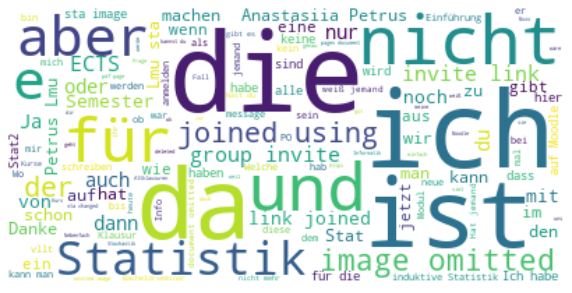

In [97]:
## Word Cloud of mostly used words in the Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

### Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

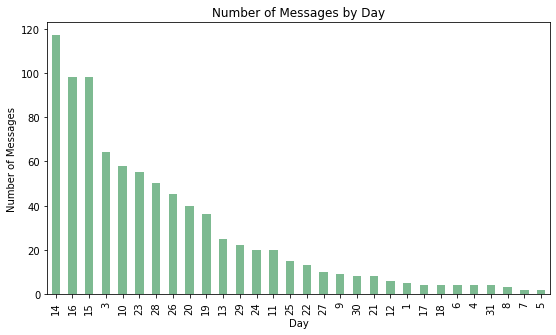

In [143]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract Year, Month, Day from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

plt.figure(figsize=(9, 5))
sns.color_palette("deep")
ax = df['Day'].value_counts().plot.bar()
ax.set_title('Number of Messages by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Messages')

plt.show()


Text(0, 0.5, 'Number of messages')

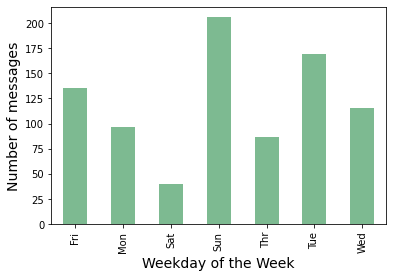

In [142]:
### mostly active day in a week
message_per_Day = df.groupby('Weekday')['Message'].count()
message_per_Day.plot.bar()
plt.xlabel('Weekday of the Week', fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages', fontdict={'fontsize': 14,'fontweight': 10})

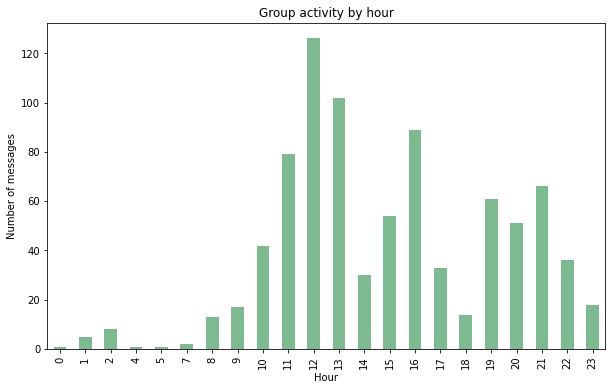

In [144]:
### the time whenever the group was highly active
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
message_per_hour = df.groupby('Hour')['Message'].count()
plt.figure(figsize=(10, 6))
#plt.bar(message_per_hour.index, message_per_hour.values)
message_per_hour.plot.bar()
plt.xlabel('Hour')
plt.ylabel('Number of messages')
plt.title('Group activity by hour')
plt.show()

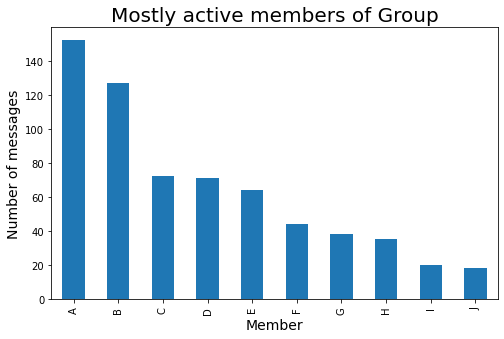

In [101]:
### Mostly Active Members in the Group
plt.figure(figsize=(8, 5))
mostly_active = df['Author'].value_counts().head(10)

### Top 10 Members that are mostly active in the Group
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
mostly_active.plot.bar()
plt.xlabel('Member',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active members of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

<Figure size 648x360 with 0 Axes>

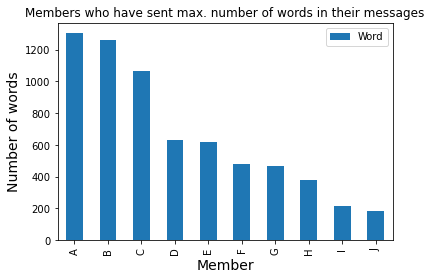

In [102]:
### Who has sent the most number of words in total
plt.figure(figsize=(9, 5))
max_words_by_user = df[['Author', 'Word']].groupby('Author').sum()
max_word_sorted = max_words_by_user.sort_values('Word', ascending = False).head(10)

bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))

max_word_sorted.plot.bar()
plt.xlabel('Member', fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of words', fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Members who have sent max. number of words in their messages')
plt.xticks(x_pos, bars)
plt.show()

---> Author: ‪+49 178 7300608‬ <---


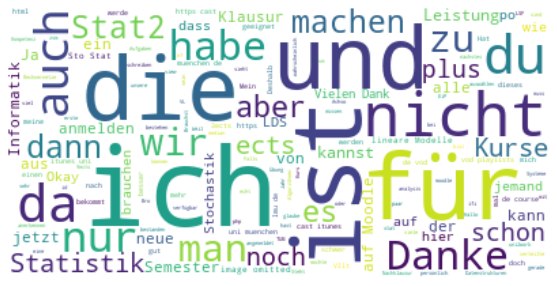

--------------------------------------------------------------------------------
---> Author: Anastasiia 125 Petrus-Lmu-sta <---


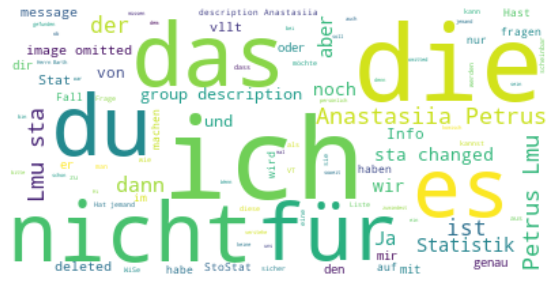

--------------------------------------------------------------------------------
---> Author: ‪+49 160 6163339‬ <---


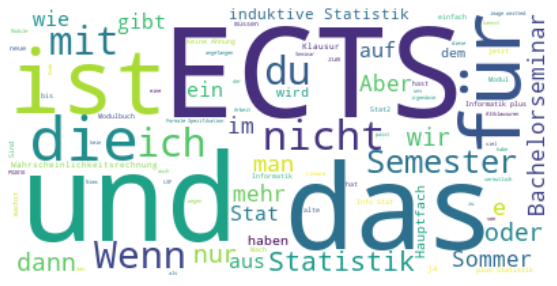

--------------------------------------------------------------------------------
---> Author: ‪+91 70329 08303‬ <---


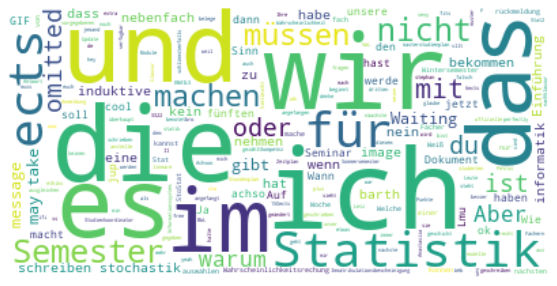

--------------------------------------------------------------------------------
---> Author: ‪+49 1511 7817941‬ <---


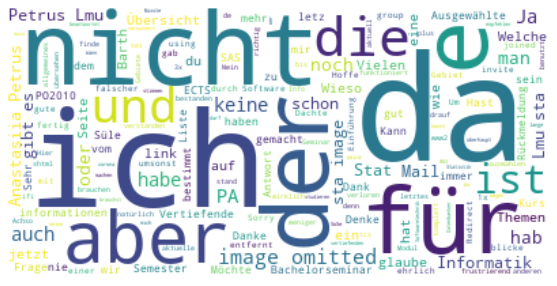

--------------------------------------------------------------------------------
---> Author: ‪+49 1520 7804876‬ <---


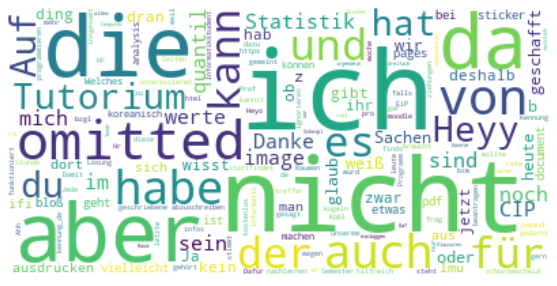

--------------------------------------------------------------------------------
---> Author: ‪+49 162 9052377‬ <---


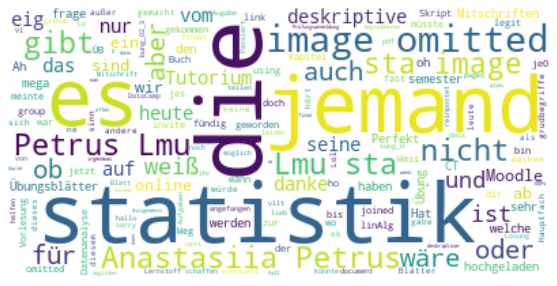

--------------------------------------------------------------------------------
---> Author: ‪+49 175 4659147‬ <---


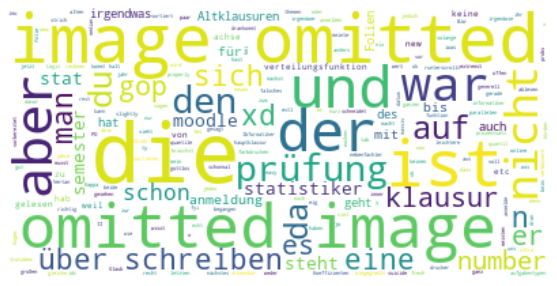

--------------------------------------------------------------------------------
---> Author: ‪+49 177 2727785‬ <---


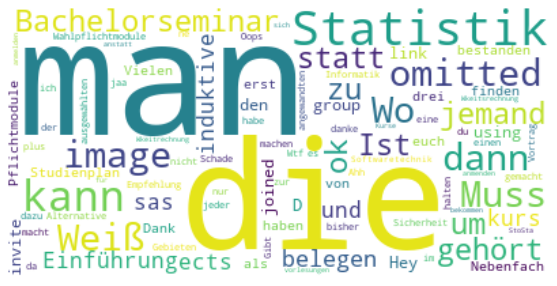

--------------------------------------------------------------------------------
---> Author: ‪+49 174 8818641‬ <---


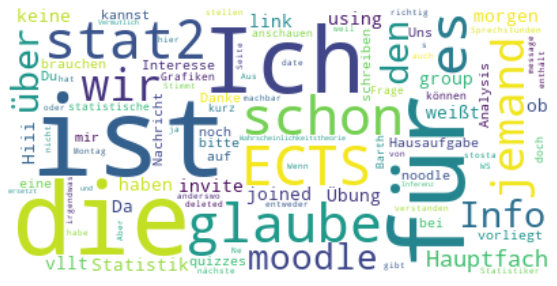

--------------------------------------------------------------------------------


In [103]:
### creating a word cloud of Top-10 highly active members
top10_active_members = df['Author'].value_counts().head(10)

bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))

for author in top10_active_members.index:
    member_chat = df[df['Author'] == author]
    print(f'---> Author: {author} <---')
    # Word Cloud of mostly used word in the Group
    msg = ' '.join(x for x in member_chat.Message)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(msg)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('-'*80)


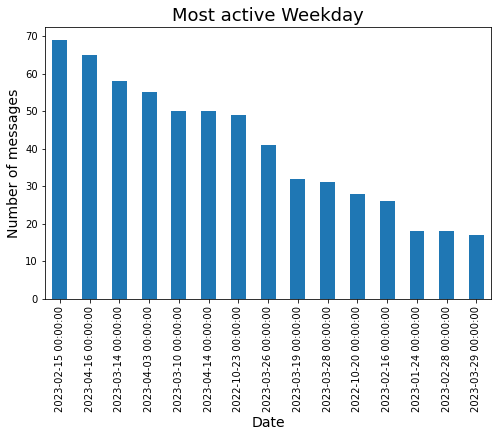

In [104]:
### the date on which our group was highly active

plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Most active Weekday',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [105]:
### Time series plot Number of messages

dates = df['Date'].value_counts() 
dates2dict = dates.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(dates2dict)

### Timeseries plot 
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Number of messages using TimeSeries plot',
                  title_x=0.5,
                  xaxis_title='Month',
                  yaxis_title='Number of Messages')
fig.update_xaxes(nticks=20)
fig.show()

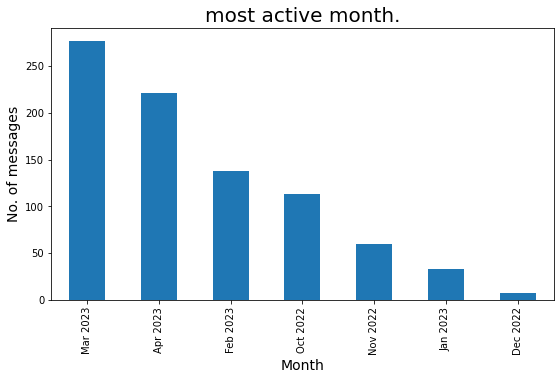

In [106]:
### creating a separate column for Month

months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

df['Month'] = df['Month'].map(months)
df['Month_Year'] = df['Month'].str.capitalize() + ' ' + df['Year'].astype(str)


### Most Active month
plt.figure(figsize=(9, 5))
active_month = df['Month_Year'].value_counts()
active_month.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('most active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

In [107]:
df.head()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year,Letters,Word,Day,Msg_count,Month_Year
1,2022-10-18,Tue,16:54:32,‪+49 162 8147633‬,‎‪+49 162 8147633‬ joined using this group's ...,0,16,Oct,2022,57,8,18,1,Oct 2022
2,2022-10-20,Thr,08:59:15,‪+49 162 9052377‬,‎‪+49 162 9052377‬ joined using this group's ...,0,8,Oct,2022,57,8,20,28,Oct 2022
3,2022-10-20,Thr,08:59:18,‪+49 162 9052377‬,ho,0,8,Oct,2022,3,2,20,28,Oct 2022
4,2022-10-20,Thr,09:05:06,‪+49 162 9052377‬,"weiß jemand, ob die Vorlesung auch online ist...",0,9,Oct,2022,99,18,20,28,Oct 2022
5,2022-10-20,Thr,09:05:15,‪+49 162 9052377‬,bin auf Moodle nicht fündig geworden,0,9,Oct,2022,37,7,20,28,Oct 2022


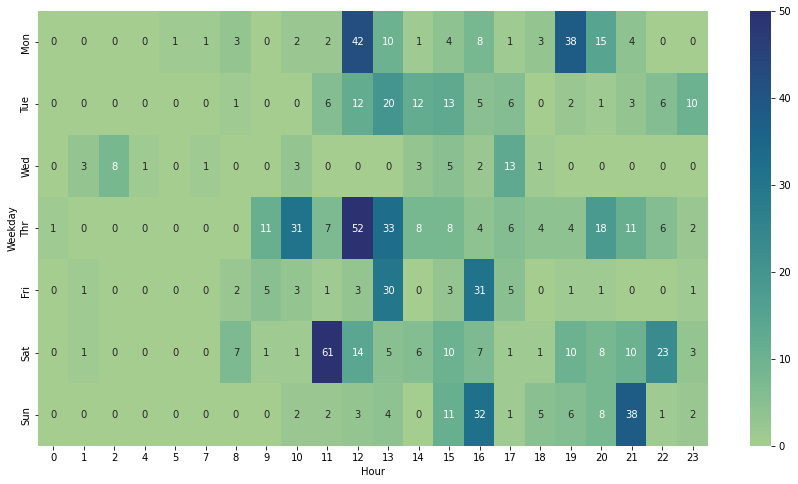

In [108]:
### Creating a heatmap to show the highly active time of the WhatsApp group

df2 = df.groupby(['Hour', 'Weekday'], as_index=False)['Message'].count()
df2 = df2.dropna()
df2.reset_index(drop=True, inplace=True)

weekdays = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(15, 8))

active_time = df2.pivot(index='Weekday', columns='Hour', values='Message')
sns.heatmap(active_time, annot=True, cmap="crest", vmax=50, yticklabels=weekdays)
plt.show()

In [112]:
### Emojis

def split_count(text):
    emoji_list = []
    data = re.findall(r'[^\s\u1f300-\u1f5ff]', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print("Emojis:", emojis)

Emojis: 206


In [113]:
### Counting the total number of unique emojis
total_emojis_list = list(set([a for b in df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

61


In [114]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(collections.Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,🤔,25
1,😅,19
2,👍,15
3,🏻,13
4,😂,13
...,...,...
56,🫨,1
57,🤬,1
58,😕,1
59,🤨,1


In [115]:
fig = px.pie(emoji_df, values='count', names='emoji',
             title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=800, height=600)
fig.show()

In [119]:
# Emojis used by the top10 active members
top10_active_members = df['Author'].value_counts().head(10)

for i in range(len(top10_active_members)):
    author = top10_active_members.index[i]
    dummy_df = df[df['Author'] == author]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(collections.Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', author)
    author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(author_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()


Emoji Distribution for ‪+49 178 7300608‬


Emoji Distribution for Anastasiia 125 Petrus-Lmu-sta


Emoji Distribution for ‪+49 160 6163339‬


Emoji Distribution for ‪+91 70329 08303‬


Emoji Distribution for ‪+49 1511 7817941‬


Emoji Distribution for ‪+49 1520 7804876‬


Emoji Distribution for ‪+49 162 9052377‬


Emoji Distribution for ‪+49 175 4659147‬


Emoji Distribution for ‪+49 177 2727785‬


Emoji Distribution for ‪+49 174 8818641‬
